In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

Let's import Monthend data which shows all the details of the customers pertaining to what loan they have and their monthend
balance related to any account they have.

In [2]:
Monthend = pd.read_excel('Month end balances.xlsx')

In [3]:
Monthend.head(3)

,masked_id,asof_yyyymm,age,tenure_altered,checking_acct_ct,savings_acct_ct,mortgage_flag,heloc_flag,personal_loan_flag,cc_flag,...,personal_loan_bal_altered,atm_withdrawls_cnt,atm_deposits_cnt,branch_visit_cnt,phone_banker_cnt,mobile_bank_cnt,online_bank_cnt,direct_mail_cnt,direct_email_cnt,direct_phone_cnt
0,12,201612,90,43.0032,2,2,0,0,0,1,...,0.0,0,0,13,0,0,0,0,0,0
1,12,201611,90,42.9150,2,2,0,0,0,1,...,0.0,0,0,11,0,0,1,0,1,3
2,12,201610,90,42.8366,2,2,0,0,0,1,...,0.0,0,0,13,0,0,0,0,0,3


Missing Data

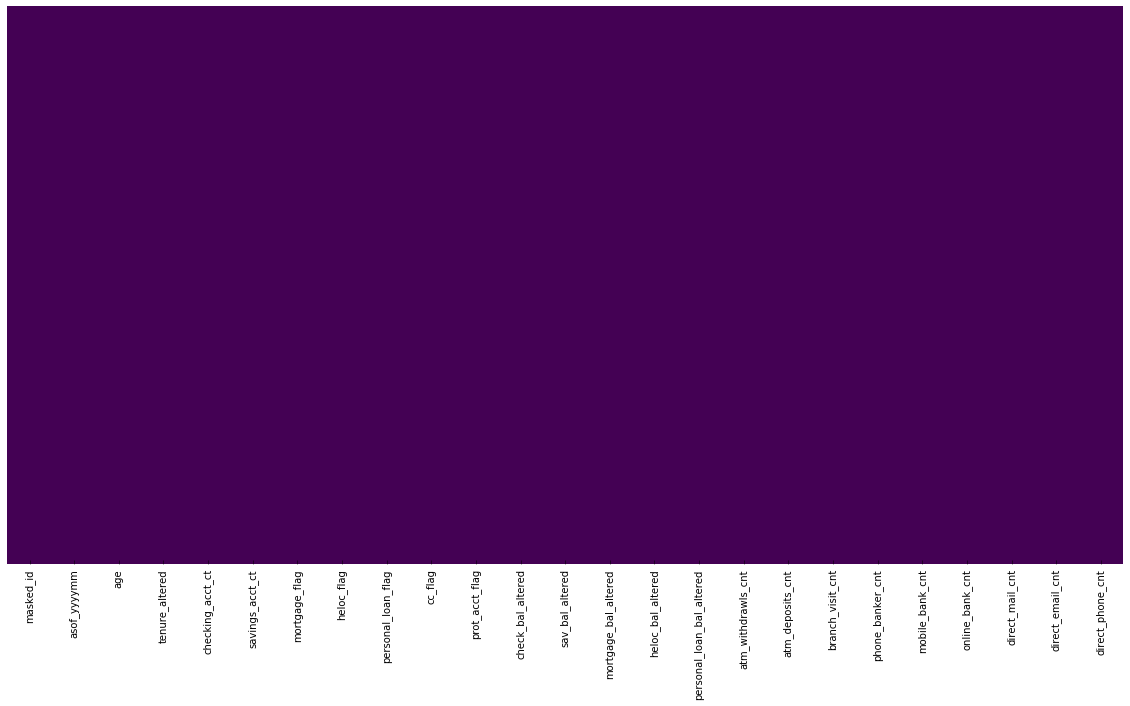

In [4]:
#Let's check the missing values.Yellow ones are the missing columns
ax = plt.figure(figsize = (20,10))
sns.heatmap(Monthend.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no missing values in this dataset

In [5]:
Monthend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 25 columns):
masked_id                    300 non-null int64
asof_yyyymm                  300 non-null int64
age                          300 non-null int64
tenure_altered               300 non-null float64
checking_acct_ct             300 non-null int64
savings_acct_ct              300 non-null int64
mortgage_flag                300 non-null int64
heloc_flag                   300 non-null int64
personal_loan_flag           300 non-null int64
cc_flag                      300 non-null int64
prot_acct_flag               300 non-null int64
check_bal_altered            300 non-null float64
sav_bal_altered              300 non-null float64
mortgage_bal_altered         300 non-null float64
heloc_bal_altered            300 non-null float64
personal_loan_bal_altered    300 non-null float64
atm_withdrawls_cnt           300 non-null int64
atm_deposits_cnt             300 non-null int64
branch_visit_cnt   

In [6]:
Monthend.describe()

,masked_id,asof_yyyymm,age,tenure_altered,checking_acct_ct,savings_acct_ct,mortgage_flag,heloc_flag,personal_loan_flag,cc_flag,...,personal_loan_bal_altered,atm_withdrawls_cnt,atm_deposits_cnt,branch_visit_cnt,phone_banker_cnt,mobile_bank_cnt,online_bank_cnt,direct_mail_cnt,direct_email_cnt,direct_phone_cnt
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000
mean,25.500000,201609.500000,50.456667,18.204365,1.686667,1.956667,0.216667,0.080000,0.080000,0.506667,...,1421.019533,2.223333,0.053333,5.723333,0.236667,0.0,20.336667,0.576667,3.813333,0.406667
std,14.454981,1.710679,19.271727,11.261548,1.064079,1.405242,0.412662,0.271746,0.271746,0.500791,...,5409.056656,4.770322,0.487800,5.248996,0.784884,0.0,30.028693,1.000396,5.090337,0.915103
min,1.000000,201607.000000,13.000000,0.677000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,13.000000,201608.000000,35.000000,8.475350,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.750000,0.000000,0.000000,0.000000
50%,25.500000,201609.500000,50.500000,17.155700,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.0,8.500000,0.000000,1.000000,0.000000
75%,38.000000,201611.000000,65.000000,25.098600,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,10.000000,0.000000,0.0,27.000000,1.000000,6.000000,0.000000
max,50.000000,201612.000000,90.000000,47.491600,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,29283.030000,30.000000,6.000000,22.000000,5.000000,0.0,230.000000,6.000000,31.000000,6.000000


Let's check the correlation between any of the variables

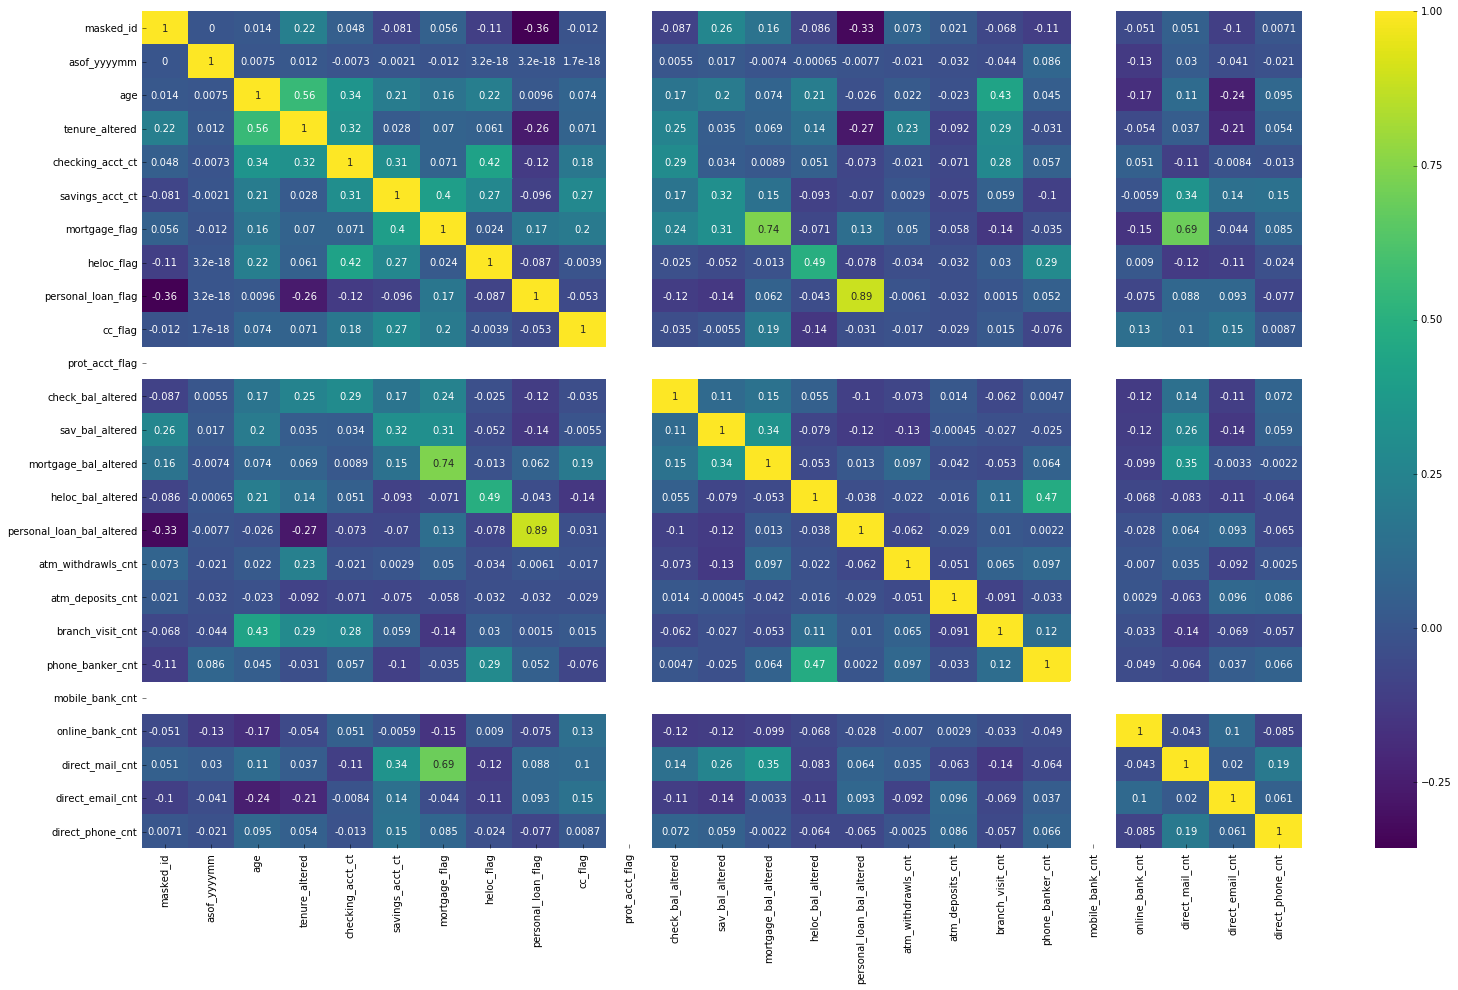

In [7]:
plt.figure(figsize = (26,15))
sns.heatmap(Monthend.corr(),cmap='viridis',annot=True)

personal_loan_bal_altered(month end balance outstanding in personal loan) and personal_loan_flag(customer has persoanl loan with
WF) are extremely corelated with correlation strength of 0.89 which means they both increase and decrease together.
Similar is the case with mortgage_bal_altered and mortgage_flag with a correlation strength of 0.74

Let's import other datasets too

In [8]:
Dailyinc = pd.read_excel('Daily Interactions with WF.xlsx')
# This basically contains data related to daily Interactions of the customers with the banking officials about any complains
# or queries customers have.

In [9]:
DailyUseCC = pd.read_excel('Daily Use of WF Credit Card.xlsx')
# This dataset contains details related to the usage of credit card by the cusotmers

In [10]:
URLData = pd.read_excel('Daily wellsfargo.com traffic.xlsx')

In [11]:
Dailyinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 5 columns):
masked_id    6669 non-null int64
Date         6669 non-null int64
Des1         6669 non-null object
Des2         6669 non-null object
Des3         6669 non-null object
dtypes: int64(2), object(3)
memory usage: 260.6+ KB


In [12]:
DailyUseCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 6 columns):
masked_id    3468 non-null int64
Date         3468 non-null int64
Des1         3468 non-null object
Des2         3468 non-null object
Des3         3468 non-null object
Payment      3468 non-null int64
dtypes: int64(3), object(3)
memory usage: 162.6+ KB


In [13]:
DailyUseCC.head()

,masked_id,Date,Des1,Des2,Des3,Payment
0,1,7032016,GROCERIES,GROCERIES,"PACKAGE STORES BEER, WINE AND LIQUOR (BMG INFE...",207
1,1,7032016,PERSONAL SERVICES,PERSONAL SERVICES,FUNERAL SERVICES AND CREMATORIES,60
2,1,7032016,FURNISHINGS,HOUSEHOLD,DIRECT MARKETING - OUTBOUND TELEMARKETING MERC...,34
3,1,7032016,ANTIQUES,RETAIL / DEPARTMENT STORES,"JEWELRY, PRECIOUS METAL",198
4,1,7052016,RECREATION,ENTERTAINMENT,STAMP AND COIN STORES,234


The three descriptions above show more granularity of the description. Des1 is the higher level of the description of the
expenditure done by the customers.

In [18]:
DailyUseCC['Des1'].value_counts().sort_values(ascending = False)

DIRECT MARKETING                  77
CONTRACTOR/BUSINESS SERVICES      74
LUGGAGE                           71
GAS                               71
REAL ESTATE                       69
FURNISHINGS                       68
EDUCATION                         68
ANTIQUES                          68
AUTO                              67
PERSONAL SERVICES                 67
OTHER                             66
JEWELRY                           66
AIRLINES                          66
RECREATION                        65
TRANSPORTATION                    65
HOBBIES                           65
VEHICLE RENTAL                    65
FAST FOOD                         65
WHOLESALE CLUBS                   64
RECREATION                        64
GAMBLING                          63
CONVENIENCE STORES                62
PHARMACY                          62
POSTAGE/DELIVERY                  61
LEGAL                             61
GOVERNMENT SERVICES               61
INSURANCE                         60
A

Direct Marketing ,Business Services,Luggage,Gas,Real Estate has the highest number of counts. Let's see if that remains true

In [14]:
#Let's check the payment values made in these descriptions
Des1_sum = DailyUseCC.groupby('Des1')
Des1 = pd.DataFrame(Des1_sum['Payment'].sum().sort_values(ascending= False))
Des1.head()

,Payment
Des1,
EDUCATION,333764
AIRLINES,99717
TRANSPORTATION,97655
TRAVEL,92324
BUILDING SUPPLY/WHOLESALE,86804


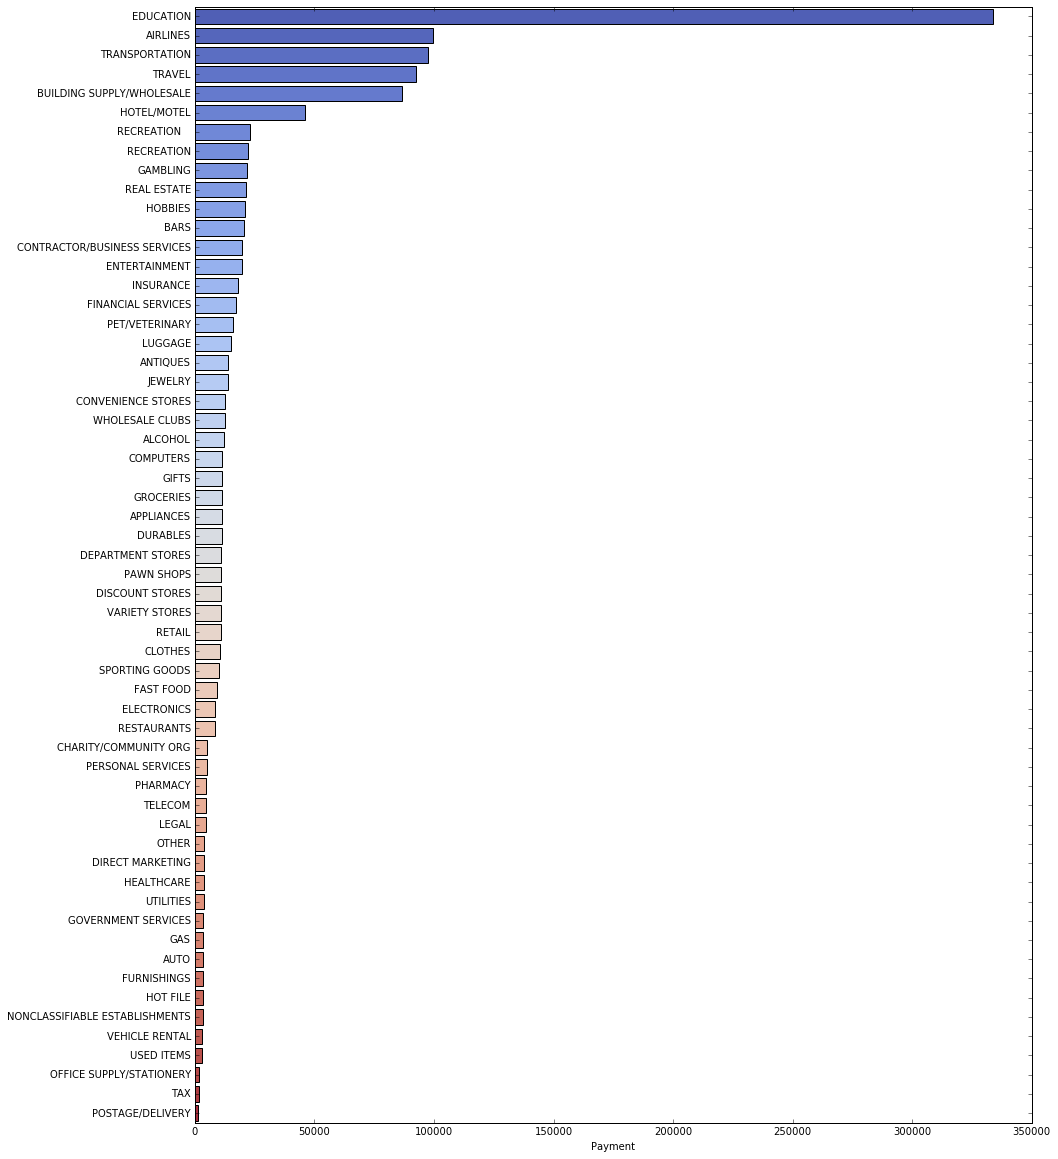

In [15]:
plt.figure(figsize = (15,20))
sns.barplot(x='Payment', y =Des1.index.values, data = Des1,palette = 'coolwarm')

We can clearly see that Education and Airlines are the most targeted industries where people use Wells Fargo Credit Card the 
most.

In [17]:
#We will create a pivot table showing which industry has how much amount spend in which specific brand.
#For example, if Airlines has the highest amount spend in total then which airlines spent the most, we will visualize that.
Daily_Pivot = DailyUseCC.pivot_table(values='Payment',index = ['Des1'], columns = 'Des3')
Daily_Pivot.head()

Des3,A-1 RENT-A-CAR,ACCENT RENT-A-CAR,"ACCOUNTING, AUDITING, AND BOOKKEEPING SERVICES",ACTION AUTO RENTAL,ADRIA,ADVANTAGE RENT-A-CAR,ADVERTISING SERVICES,AERO COACH,AERO VIRGIN ISLANDS,AEROFLOT,...,WHOLESALE DISTRIBUTORS AND MANUFACTURERS (BMG INFERRED DEFINITION),WIDEROE'S FLYVESELSKAP,WIG AND TOUPEE STORES,WINDWARD ISLAND,WIRE TRANSFER MONEY ORDERS,WOMENS ACCESSORY AND SPECIALTY SHOPS,WOMENS ACCESSORY AND SPECIALTY SHOPS (BMG INFERRED DEFINITION),WOMENS READY-TO-WEAR STORES,WOMENS READY-TO-WEAR STORES (BMG INFERRED DEFINITION),WRECKING AND SALVAGE YARDS
Des1,,,,,,,,,,,,,,,,,,,,,
AIRLINES,NaN,NaN,NaN,NaN,1920.5,NaN,NaN,1079.0,1062.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALCOHOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANTIQUES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,207.333333,NaN,NaN,246.5,157.0,199.5,NaN,NaN
APPLIANCES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.000000,NaN,NaN,NaN,253.0,NaN,271.5,NaN
AUTO,NaN,56.0,NaN,48.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
Airline = Daily_Pivot.iloc[0]
Airline.head()
Airline = Airline.to_frame(name = None)
Airline_Detail = Airline.dropna(thresh=1)
Airline_Detail.head()

,AIRLINES
Des3,
ADRIA,1920.5
AERO COACH,1079.0
AERO VIRGIN ISLANDS,1062.0
AEROMEXICO,828.0
AEROPERU,1626.0


In [19]:
Airline_Detail.reset_index(level=0, inplace=True)

In [20]:
Airline_Detail['AIRLINES'].sort_values(ascending= False)

19    2212.0
46    2153.0
15    2115.0
50    2107.0
29    2056.0
16    2005.0
56    1979.0
57    1926.0
0     1920.5
21    1900.0
38    1892.0
13    1889.0
8     1869.0
36    1823.0
5     1817.0
48    1798.0
9     1789.0
6     1737.0
34    1727.0
43    1720.0
20    1719.0
49    1716.5
41    1703.0
33    1672.0
30    1670.0
11    1665.0
54    1638.0
4     1626.0
25    1614.0
39    1594.0
40    1581.0
7     1532.5
31    1465.0
42    1460.0
14    1438.0
17    1382.0
52    1325.0
12    1316.0
59    1285.0
44    1214.0
24    1202.0
22    1193.5
28    1174.0
27    1168.0
47    1167.0
18    1123.0
1     1079.0
51    1078.0
2     1062.0
55    1036.0
10    1013.0
32    1012.0
45     969.0
37     967.0
23     933.0
26     887.0
35     870.0
53     868.0
3      828.0
58     803.0
Name: AIRLINES, dtype: float64

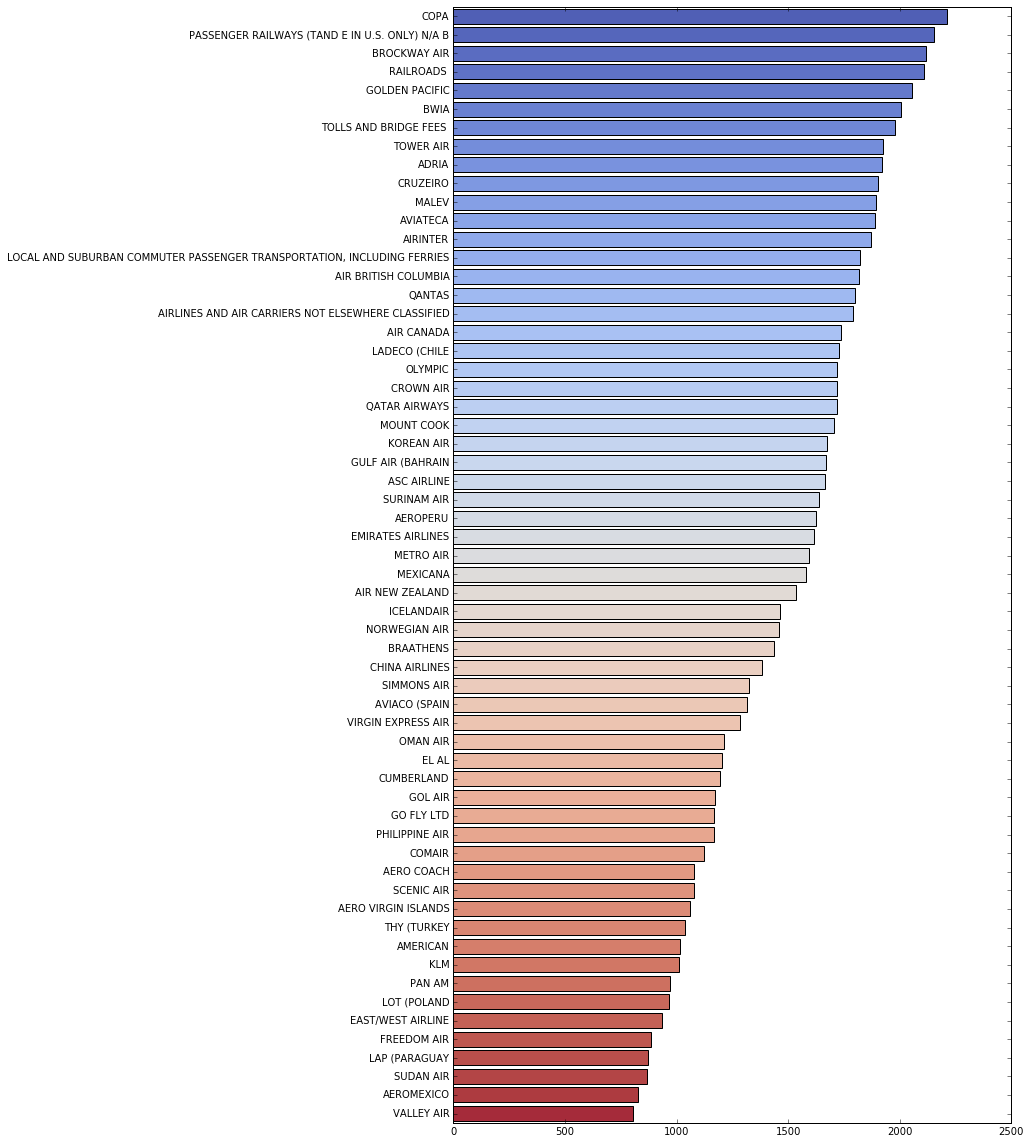

In [21]:
x = Airline_Detail['AIRLINES']
y = Airline_Detail['Des3']

pairs = zip(x, y)
pairs= sorted(pairs, key=lambda x: x[0], reverse= True)

newx, newy = zip(*pairs)
plt.figure(figsize = (10,20))
ax = sns.barplot(x=newx, y=newy,palette = 'coolwarm')

plt.show()

As per the description above, bank can target specific airlines and have some credit card promotional offers, since customers
spend most in their specific airlines.

Let's check for education and see where most of the expenses are done.

In [22]:
Education = Daily_Pivot.iloc[16]
Education.head()
Education = Education.to_frame(name = None)
Education_Detail = Education.dropna(thresh=1)
Education_Detail.head()

,EDUCATION
Des3,
BUSINESS AND SECRETARIAL SCHOOLS,5552.142857
"COLLEGES, UNIVERSITIES, PROFESSIONAL SCHOOLS, JUNIOR COLLEGES",5305.000000
CORRESPONDENCE SCHOOLS,5019.500000
ELEMENTARY AND SECONDARY SCHOOLS,4428.666667
ELEMENTARY AND SECONDARY SCHOOLS (BMG INFERRED DEFINITION),4741.666667


In [23]:
Education_Detail.reset_index(level=0, inplace=True)

In [24]:
Education_Detail.head()

,Des3,EDUCATION
0,BUSINESS AND SECRETARIAL SCHOOLS,5552.142857
1,"COLLEGES, UNIVERSITIES, PROFESSIONAL SCHOOLS, ...",5305.000000
2,CORRESPONDENCE SCHOOLS,5019.500000
3,ELEMENTARY AND SECONDARY SCHOOLS,4428.666667
4,ELEMENTARY AND SECONDARY SCHOOLS (BMG INFERRED...,4741.666667


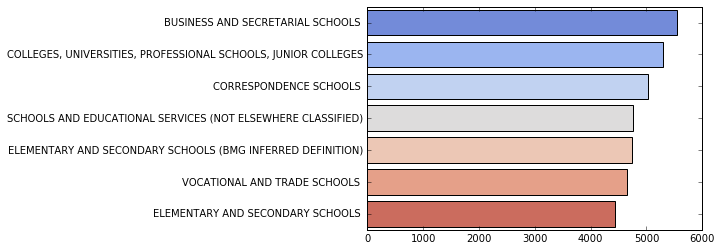

In [25]:
x = Education_Detail['EDUCATION']
y = Education_Detail['Des3']

pairs = zip(x, y)
pairs= sorted(pairs, key=lambda x: x[0], reverse= True)

newx, newy = zip(*pairs)
ax = sns.barplot(x=newx, y=newy,palette = 'coolwarm')

plt.show()

We can see that most of the amount is spend on business schools and colleges and universities which is evident because they 
have a high fees.

In [26]:
Transportation = Daily_Pivot.iloc[-7]
Transportation.head()
Transportation = Transportation.to_frame(name = None)
Transportation_Detail = Transportation.dropna(thresh=1)
Transportation_Detail.head()

,TRANSPORTATION
Des3,
ADRIA,1724.0
AERO VIRGIN ISLANDS,2146.0
AEROFLOT,1146.0
AEROPERU,1173.0
AIR AFRIQUE,2212.0


In [27]:
Transportation_Detail.reset_index(level=0, inplace=True)

In [28]:
Transportation_Detail.head()

,Des3,TRANSPORTATION
0,ADRIA,1724.0
1,AERO VIRGIN ISLANDS,2146.0
2,AEROFLOT,1146.0
3,AEROPERU,1173.0
4,AIR AFRIQUE,2212.0


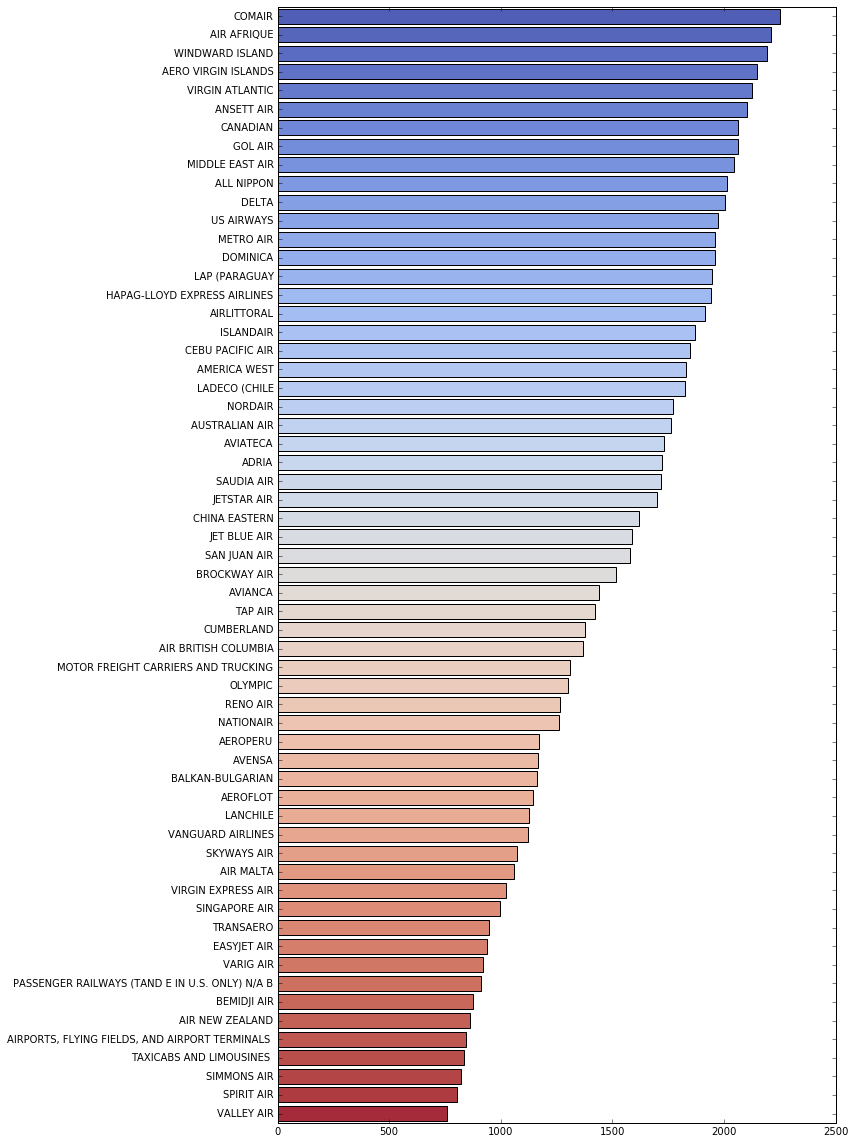

In [29]:
x = Transportation_Detail['TRANSPORTATION']
y = Transportation_Detail['Des3']

pairs = zip(x, y)
pairs= sorted(pairs, key=lambda x: x[0], reverse= True)

newx, newy = zip(*pairs)
plt.figure(figsize = (10,20))
ax = sns.barplot(x=newx, y=newy,palette = 'coolwarm')

plt.show()

Let's see on monthly basis how much balances people have each month in their checkings and balance account.

In [30]:
#Converting date to datetime format
Monthend['asof_yyyymm'] = pd.to_datetime(Monthend['asof_yyyymm'].astype(str), format='%Y%m')

In [31]:
Monthend['asof_yyyymm'].head()

0   2016-12-01
1   2016-11-01
2   2016-10-01
3   2016-09-01
4   2016-08-01
Name: asof_yyyymm, dtype: datetime64[ns]

In [32]:
Tenure = Monthend.groupby('asof_yyyymm')

In [33]:
Tenure = Tenure.sum().check_bal_altered.sort_values(ascending = False).to_frame()

In [34]:
Tenure['check_bal_altered']

asof_yyyymm
2016-09-01    1.074922e+06
2016-12-01    1.020289e+06
2016-11-01    9.723387e+05
2016-07-01    9.668336e+05
2016-10-01    9.553620e+05
2016-08-01    9.436253e+05
Name: check_bal_altered, dtype: float64

In [41]:
Pivot_Monthend = Monthend.pivot_table(values = ['personal_loan_bal_altered','atm_withdrawls_cnt','atm_deposits_cnt',
'branch_visit_cnt','phone_banker_cnt','mobile_bank_cnt','online_bank_cnt','direct_mail_cnt','direct_email_cnt',
    'direct_phone_cnt','check_bal_altered','sav_bal_altered','mortgage_bal_altered','heloc_bal_altered'],
index = ['asof_yyyymm'])
Pivot_Monthend

,atm_deposits_cnt,atm_withdrawls_cnt,branch_visit_cnt,check_bal_altered,direct_email_cnt,direct_mail_cnt,direct_phone_cnt,heloc_bal_altered,mobile_bank_cnt,mortgage_bal_altered,online_bank_cnt,personal_loan_bal_altered,phone_banker_cnt,sav_bal_altered
asof_yyyymm,,,,,,,,,,,,,,
2016-07-01,0.00,2.38,6.36,19336.671656,4.36,0.40,0.18,4051.93088,0.0,39063.550268,23.68,1482.1554,0.22,132642.207336
2016-08-01,0.16,2.24,5.66,18872.505968,3.76,0.50,0.48,4039.79582,0.0,38866.552432,26.08,1457.4010,0.10,130611.586444
2016-09-01,0.08,2.16,6.14,21498.430892,2.68,0.74,0.66,4038.32750,0.0,38711.525840,23.56,1433.2480,0.14,126837.014774
2016-10-01,0.00,2.40,5.02,19107.240232,5.28,0.78,0.40,4026.05804,0.0,38538.331616,17.08,1408.5324,0.34,125165.042364
2016-11-01,0.08,2.22,5.30,19446.774160,3.90,0.56,0.70,4013.75624,0.0,38374.101452,16.22,1384.6704,0.26,143062.430690
2016-12-01,0.00,1.94,5.86,20405.770408,2.90,0.48,0.02,3996.14690,0.0,36394.607668,15.40,1360.1100,0.36,140793.941360


In [42]:
Pivot_Monthend = Pivot_Monthend.reset_index()
Pivot_Monthend['asof_yyyymm']

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
5   2016-12-01
Name: asof_yyyymm, dtype: datetime64[ns]

In order to read the data in time series format, we have to pass special arguments to read_csv command

In [43]:
Monthend.head()

,masked_id,asof_yyyymm,age,tenure_altered,checking_acct_ct,savings_acct_ct,mortgage_flag,heloc_flag,personal_loan_flag,cc_flag,...,personal_loan_bal_altered,atm_withdrawls_cnt,atm_deposits_cnt,branch_visit_cnt,phone_banker_cnt,mobile_bank_cnt,online_bank_cnt,direct_mail_cnt,direct_email_cnt,direct_phone_cnt
0,12,2016-12-01,90,43.0032,2,2,0,0,0,1,...,0.0,0,0,13,0,0,0,0,0,0
1,12,2016-11-01,90,42.9150,2,2,0,0,0,1,...,0.0,0,0,11,0,0,1,0,1,3
2,12,2016-10-01,90,42.8366,2,2,0,0,0,1,...,0.0,0,0,13,0,0,0,0,0,3
3,12,2016-09-01,89,42.7484,2,2,0,0,0,1,...,0.0,0,0,19,0,0,1,0,1,5
4,12,2016-08-01,89,42.6700,2,2,0,0,0,1,...,0.0,0,0,12,0,0,0,0,0,2


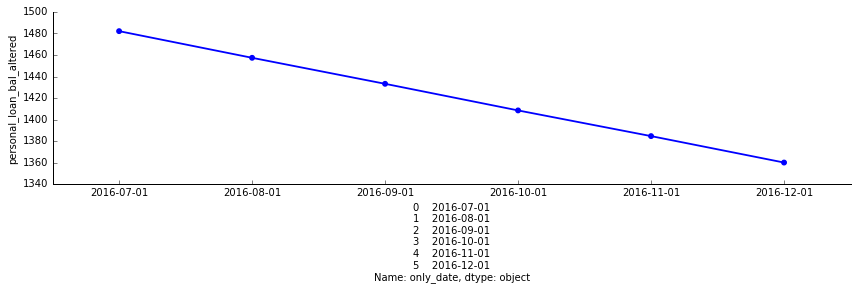

In [44]:
from datetime import datetime
d = datetime.now()
Pivot_Monthend["only_date"] = [d.date() for d in Pivot_Monthend["asof_yyyymm"]]
sns.factorplot(x= Pivot_Monthend["only_date"], y = 'personal_loan_bal_altered', data = Pivot_Monthend, size = 4, aspect = 3, 
               kind = 'point')

In [ ]:
We can see that monthend balance of perosnal loan goes down in the month Dec.

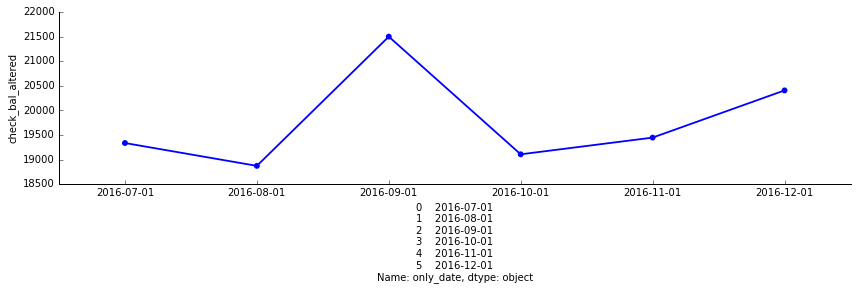

In [45]:
plt.figure(figsize = (15,10))
sns.factorplot(x= Pivot_Monthend["only_date"], y = 'check_bal_altered', data = Pivot_Monthend, size = 4, aspect = 3, 
               kind = 'point')

Checking balance goes high in the month of Sep, goes down again and again goes high in Dec.

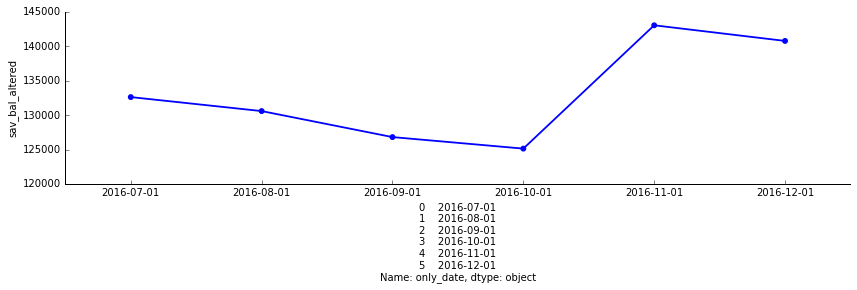

In [46]:
plt.figure(figsize = (15,10))
sns.factorplot(x= Pivot_Monthend["only_date"], y = 'sav_bal_altered', data = Pivot_Monthend, size = 4, aspect = 3, kind = 'point')

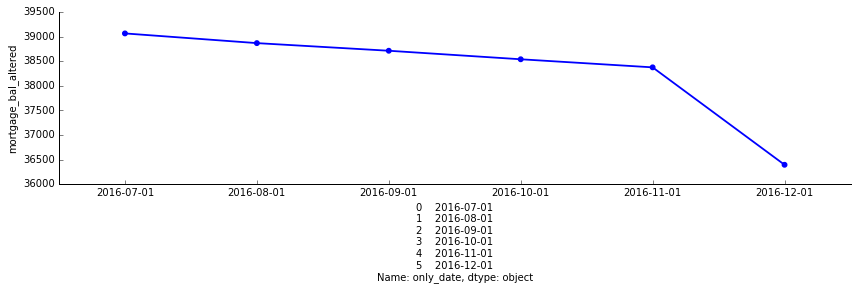

In [47]:
plt.figure(figsize = (15,10))
sns.factorplot(x= Pivot_Monthend["only_date"], y = 'mortgage_bal_altered', data = Pivot_Monthend, size = 4, aspect = 3, 
               kind = 'point')

In [41]:
Pivot_Monthend_ts = Pivot_Monthend.filter(['asof_yyyymm','check_bal_altered'], axis=1)

In [42]:
Pivot_Monthend_ts.head()

,asof_yyyymm,check_bal_altered
0,2016-07-01,19336.671656
1,2016-08-01,18872.505968
2,2016-09-01,21498.430892
3,2016-10-01,19107.240232
4,2016-11-01,19446.774160


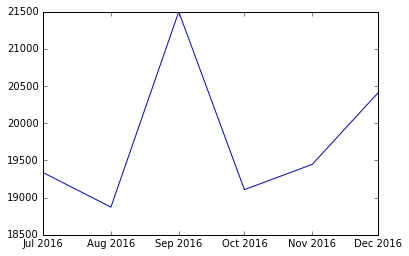

In [43]:
plt.plot(Pivot_Monthend_ts['asof_yyyymm'],Pivot_Monthend_ts['check_bal_altered'])

Let's merge the data and see what we can retrieve

In [51]:
Interactions_Use = pd.merge(Dailyinc,DailyUseCC,how='left',on=['masked_id','Date'])

In [52]:
Interactions_Use_Url = pd.merge(Interactions_Use,URLData,how='left',on=['masked_id','Date'])

In [56]:
Interactions_Use_Url.head()

,masked_id,Date,Des1_x,Des2_x,Des3_x,Des1_y,Des2_y,Des3_y,Payment,wf_page
0,1,7012016,Add Banker Note,Customer Phone Change,POS Debit,NaN,NaN,NaN,NaN,About Wells Fargo/Still have questions?/Call Us
1,1,7012016,Add Banker Note,Customer Phone Change,POS Debit,NaN,NaN,NaN,NaN,About Wells Fargo/Working With Us/Careers at W...
2,1,7012016,Add Banker Note,Customer Phone Change,POS Debit,NaN,NaN,NaN,NaN,About Wells Fargo/Get to Know Our Company/Visi...
3,1,7012016,Add Banker Note,Customer Phone Change,POS Debit,NaN,NaN,NaN,NaN,About Wells Fargo/Still have questions?/Make a...
4,1,7012016,Add Banker Note,Customer Phone Change,POS Debit,NaN,NaN,NaN,NaN,About Wells Fargo/Get to Know Our Company/Inve...


Through daily Use of WF Credit Card we can find buying habits of customer and then we can segregate various customer segments.
This way we can target customers and the products customers are interested in. As a result customers will be attracted towards 
various WF Credit cards or other products that caters to customer interests.

In [25]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

# Text Analytics

In [48]:
Dailyinc.head()

,masked_id,Date,Des1,Des2,Des3
0,1,7012016,Add Banker Note,Customer Phone Change,POS Debit
1,1,7022016,Advance Reversal,Customer to Customer Relationship Maintained,POS Preauthorization
2,1,7032016,Consumer Recommendations Create MSR,NEW_ACCT_FUNDING_INFO,Settlements
3,1,7032016,Business Deposit and Credit flow selected,DUPLICATE_TIN_OVERRIDE,REPORT WORKFLOW STATISTICS
4,1,7032016,Credit Adjustment,ODP Maintenance,STATE_RESTRICTION


In [49]:
Des1 = pd.DataFrame(Dailyinc,columns=['Des1'])

In [50]:
Des1.head()

,Des1
0,Add Banker Note
1,Advance Reversal
2,Consumer Recommendations Create MSR
3,Business Deposit and Credit flow selected
4,Credit Adjustment


In [51]:
Dailyinc['Des1'].str.len().head()

0    15
1    16
2    35
3    41
4    17
Name: Des1, dtype: int64

In [52]:
#To find no. of token of each element of the series
Dailyinc['Des1'].str.split().str.len().head()

0    3
1    2
2    4
3    6
4    2
Name: Des1, dtype: int64

In [53]:
#To check which string contains which pattern like which entries contains the word credit
Dailyinc['Des1'].str.contains('credit').head()

0    False
1    False
2    False
3    False
4    False
Name: Des1, dtype: bool

In [54]:
#To find how many times a pattern occur in each string
Dailyinc['Des1'].str.count('select')

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6639    0
6640    0
6641    0
6642    0
6643    0
6644    0
6645    0
6646    0
6647    0
6648    0
6649    0
6650    0
6651    0
6652    0
6653    0
6654    0
6655    0
6656    0
6657    0
6658    0
6659    0
6660    0
6661    0
6662    0
6663    0
6664    0
6665    0
6666    0
6667    0
6668    0
Name: Des1, dtype: int64

In [55]:
Dailyinc['Des1'].str.findall('select')

0             []
1             []
2             []
3       [select]
4             []
5             []
6             []
7             []
8             []
9             []
10      [select]
11            []
12            []
13            []
14            []
15            []
16            []
17            []
18            []
19            []
20            []
21            []
22            []
23            []
24            []
25            []
26            []
27            []
28            []
29            []
          ...   
6639          []
6640          []
6641          []
6642          []
6643          []
6644          []
6645          []
6646          []
6647          []
6648          []
6649          []
6650          []
6651          []
6652          []
6653          []
6654          []
6655          []
6656          []
6657          []
6658          []
6659          []
6660          []
6661          []
6662          []
6663          []
6664          []
6665          []
6666          

In [56]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [57]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [58]:
list(set(Dailyinc['Des1'])) #unique words in Des 1

[u'Bank Product Purchase',
 u'CIV_SPECIAL_RATES',
 u'CHECK ORDER',
 u'Business Deposit and Credit flow selected',
 u'ACH Prenote',
 u'Cash WFB Check-OWNER',
 u'CIVSALES_PMA_ADD/REMOVE_OWNERS',
 u'CIVSALES_CUST_NEEDS_ASSESSMENT',
 u'Check Card Purchase Transaction',
 u'Consumer Deposit and Credit flow selected',
 u'College Information Maintenance',
 u'Bank-initiated transfer',
 u'CIVSALES_NEW_PMA',
 u'ATM/CHECK CARD MAINTENANCE',
 u'CNA Updated',
 u'Account Inquiry',
 u'CORRESPONDENCE',
 u'Account Open - IRA Account',
 u'CUAC Maintenance',
 u'Check Card Purchase Preauthorization',
 u'Cancelled',
 u'CREDIT CARD REWARDS',
 u'Authorized Debit',
 u'Business Credit Only flow selection',
 u'Bill Payment Reject',
 u'CIVSALES_PMA_ACCOUNT_CONVERSION',
 u'AUTHENTICATION_TRACKER_ON_OFF',
 u'CIVSALES_CIP_VALIDATION',
 u'Check',
 u'Consumer  New ATM/Check Card Only flow selected',
 u'Consumer Recommendations Create MSR',
 u'CIVSSALES_PMA_ACCOUNT_LINKAGES',
 u'CIVSALES_REPORT_REASON_FOR_CALL',
 u'Com

In [59]:
dist = FreqDist(Dailyinc['Des1'])

In [60]:
len(dist) #  No. of unique words in 1st Desc

103

In [61]:
vocab1 = dist.keys()

In [62]:
Freqwords = [ w for w in vocab1 if len(w) > 3 and dist[w] > 70]

In [63]:
Freqwords

[u'ACH Prenote',
 u'CIVSALES_NEW_PMA',
 u'CUAC Maintenance',
 u'Authorized Debit',
 u'CIVSALES_CIP_VALIDATION',
 u'Consumer Recommendations Create MSR',
 u'CIVSALES_REPORT_REASON_FOR_CALL',
 u'Complete Contact Event',
 u'Balance Inquiry',
 u'Correction',
 u'CIVSALES_CIP_UPDATE',
 u'CIVSALES_TAB_CLICKER',
 u'Verify WFB Funds',
 u'Cancel Contact Event',
 u'Customer Address Change',
 u'CIVSALES_ONLINE_BANKING_BILL_PAY',
 u'Consumer Deposit Only flow selected',
 u'Cash Check on Credit Card/LOC',
 u'Advance Reversal',
 u'Business\xa0\xa0Deposit Only \u2013 Special Relationship flow',
 u'Advance',
 u'CIVSALES_PARTNER_REFERRAL_CREATED']

Normalization : Seperate different forms of the same word like seperate listed, list,lists,listing, etc.
Stemming: Stemming is to find the root word or the root form of any given word

In [64]:
document_text = list(Dailyinc['Des1'].values.flatten()) # Convert Dataframe to list

In [65]:
type(document_text)

list

In [66]:
document_text1 = ''.join(document_text) # Convert list to string
#document_text1 = ''.join(str(e) for e in document_text)
#map(str,document_text.encode('utf8'))

In [67]:
type(document_text1)

unicode

In [68]:
document_text1

u'Add Banker NoteAdvance ReversalConsumer Recommendations Create MSRBusiness Deposit and Credit flow selectedCredit AdjustmentBill Payment RejectATM Time OutATM/DEBIT PIN CARDAdd Contact EventAccount ClosedBusiness Deposit \u2013 IOLTA flow selectionBill Payment MiscellaneousBALANCE TRANSFERSBill Payment ReversalCIVSSALES_PMA_ACCOUNT_LINKAGESAdvance ReversalAccount Open - IRA AccountATM/DEBIT PIN CARDCloseUpdateMSRBook Transfer CreateBank-initiated transferCREDIT_CARD_FEE_REIMBURSEMENTBusiness\xa0\xa0Deposit Only \u2013 Special Relationship flowBALANCE TRANSFERSAuthorized DebitCNA UpdatedAccount Hold AddCHECK ORDERAdd Contact EventBalance InquiryCIVSALES_ONLINE_BANKING_BILL_PAYCNA AddedAccount Hold AddCREDIT_CARD_FEE_REIMBURSEMENTBill Payment RejectBusiness Credit Only flow selectionCONTACT_EVENT_CREATEDAccount MaintenanceBusiness - Deposit - RETA flow  selectedAdvance ReversalCash WFB CheckCIVSALES_TAB_CLICKERCheck Card CreditCIVSSALES_PMA_ACCOUNT_LINKAGESVerify WFB FundsAdd Contact E

In [69]:
import re
import string
frequency = {}
#document_text = open('Listofwords', 'r')
#text_string = document_text1.read()
match_pattern = re.findall(r'\b[A-z]{4,15}\b', document_text1)
#match_pattern = Dailyinc['Des1'].str.findall(r'\b[a-z]{3,15}\b')
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()

for words in frequency_list:
    print words, frequency[words]

ATMAdvanceCHECK 1
OpenCNA 1
InitiatedAgent 1
PrenoteVerify 2
ATMCredit 2
AdvanceAgent 1
FailureCREDIT 1
accessedCancel 1
MSRAdd 2
AddedConsumer 3
OWNERCheckATM 1
UpdatedCredit 5
MSRCash 5
CreditBank 3
selectedCNA 8
InquiryCredit 6
RETA 67
CheckWire 1
Business 4
FundsACCOUNT 2
AdjustmentCUAC 2
PrenoteCheck 2
ReversalCommon 7
LevelBALANCE 2
PurchaseAccount 1
debitATM 1
ClosedAccount 3
InquiryBalance 5
AddedCHECK 1
InquiryAdd 7
CreditCredit 6
transferBill 2
BondBalance 1
LOCAdvanceBill 1
CreateCommon 4
selectionCREDIT 3
CheckAuthorized 2
ATMACH 2
AccountCash 4
LevelWire 3
NoteAdvance 2
CreditCNA 3
flowBalance 3
accessedCash 2
ReversalBalance 5
OpenBusiness 3
TRANSFERSCREDIT 1
FundsBill 6
OutAccount 6
Accounts 70
REQUESTCREDIT 1
OWNERCHECK 1
InquiryVerify 5
CARDCustomer 1
OWNERCNA 1
flowCommon 3
CheckBusiness 11
CARDACH 1
EventBALANCE 2
AddedWire 1
AddedCash 5
Only 352
ChangeCREDIT 1
LOCWire 1
MAINTENANCECNA 1
ReversalAccount 15
REQUESTATM 5
debitCash 1
CHANGECUAC 2
REWARDSAccount 4
REQUES

Above are the words and their frrequency in the description, through this we can check which particular words are repeated most
and ask the bank to focus on those areas or automate the process in those particular fields os that call are reduced and
things are handled through online apps.

In [72]:
#Print pair of words and their frequency of coccurence

wordlist = document_text1.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

#print("String\n" + document_text1 +"\n")
#print("List\n" + str(wordlist) + "\n")
#print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(zip(wordlist, wordfreq)))

Pairs
[(u'Add', 1), (u'Banker', 61), (u'NoteAdvance', 2), (u'ReversalConsumer', 17), (u'Recommendations', 71), (u'Create', 71), (u'MSRBusiness', 1), (u'Deposit', 444), (u'and', 130), (u'Credit', 315), (u'flow', 532), (u'selectedCredit', 20), (u'AdjustmentBill', 5), (u'Payment', 183), (u'RejectATM', 3), (u'Time', 64), (u'OutATM/DEBIT', 1), (u'PIN', 63), (u'CARDAdd', 1), (u'Contact', 208), (u'EventAccount', 12), (u'ClosedBusiness', 8), (u'Deposit', 444), (u'\u2013', 157), (u'IOLTA', 70), (u'flow', 532), (u'selectionBill', 5), (u'Payment', 183), (u'MiscellaneousBALANCE', 1), (u'TRANSFERSBill', 2), (u'Payment', 183), (u'ReversalCIVSSALES_PMA_ACCOUNT_LINKAGESAdvance', 1), (u'ReversalAccount', 15), (u'Open', 61), (u'-', 195), (u'IRA', 61), (u'AccountATM/DEBIT', 1), (u'PIN', 63), (u'CARDCloseUpdateMSRBook', 1), (u'Transfer', 186), (u'CreateBank-initiated', 3), (u'transferCREDIT_CARD_FEE_REIMBURSEMENTBusiness', 1), (u'Deposit', 444), (u'Only', 352), (u'\u2013', 157), (u'Special', 87), (u'Relat

We can see words like Transfer have ocurred 186 times, Purchse 179 times, Deposit 444 times.
We can further create clusters of these words and check the clusters individually.

# Word - Frequency Pairs

In [73]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [75]:
#We will add stopwords also
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [76]:
clean_list = [w for w in wordlist if w not in stopwords.words('english')]

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [80]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_list)
true = 5
model = KMeans(n_clusters=true, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=5, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [81]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  card  credit  wfb  tool  customer  transfer  payment  history  purchase  check
Cluster 1:  initiated  selectedbank  maintenancebank  reversalbank  accountbank  rewardsbank  callbank  createbank  failurebank  inquirybank
Cluster 2:  flow  debitcivsales_risk_screeningcivsales_tab_clickeratm  debitcivsales_pma_account_conversioncivsales_risk_screeningaccount  debitcivsales_pma_account_conversioncivsales_partner_referral_createdcivsales_pma_add  debitcivsales_partner_referral_createdbalance  debitcivsales_partner_referral_createdaccount  debitcivsales_new_pmacivsales_cards  debitcivsales_new_pmacheck  debitcivsales_new_customer  debitcivsales_customer_sessionaddress
Cluster 3:  contact  wfb  debitcivsales_customer_sessionaddress  debitcivsales_pma_account_conversioncivsales_risk_screeningaccount  debitcivsales_pma_account_conversioncivsales_partner_referral_createdcivsales_pma_add  debitcivsales_partner_referral_createdbalance  debitcivsales_partner_refer

In [ ]:
We have formed basically Clusters of word and we can see that Cluster 0 has most of the owrd srelated to credit, trnasfer,
history, purchase which means customers are facing most issues with these keywords.